In [29]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import emoji
from collections import defaultdict, Counter
nltk.download('nps_chat')
nltk.download('punkt')

[nltk_data] Downloading package nps_chat to
[nltk_data]     C:\Users\herme_000\AppData\Roaming\nltk_data...
[nltk_data]   Package nps_chat is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\herme_000\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:

ppl_dict = defaultdict(list)
with open("CalcSampleChatBetween2People.txt", "r", encoding='utf-8') as file:
    for line in file:
        try:
            person = line.split(":")[2][7:] #extracts person's name
            message = line.split(":")[3:]
            text = nltk.sent_tokenize(":".join(message)) #Tokenize text or message user sent
            ppl_dict[person].extend(text)
        except:
            pass
     

In [7]:
posts = nltk.corpus.nps_chat.xml_posts()
def extract_features(post):
    features = {}
    for word in nltk.word_tokenize(post):
        features['contains({})'.format(word.lower())] = True
    return features

fposts = [(extract_features(p.text), p.get('class')) for p in posts]
test_size = int(len(fposts) * 0.1)
train_set, test_set = fposts[test_size:], fposts[:test_size]
classifier = nltk.NaiveBayesClassifier.train(train_set)


In [9]:
classifier.classify(extract_features('Who here loves the FIU Developer Student Club (DSC) chapter?')) 

'Clarify'

In [14]:
df = pd.DataFrame()
mapper = {}
for key, value in ppl_dict.items():
    for message in value:
        pred = classifier.classify(extract_features(message))
        if pred not in mapper:
            mapper[pred] = 1
        else:
            mapper[pred] += 1


In [25]:
print(mapper)
df = pd.DataFrame.from_dict(mapper, orient='index')
df.columns = ['Frequency']
df


{'nAnswer': 14, 'Statement': 63, 'Clarify': 25, 'Emphasis': 10, 'ynQuestion': 19, 'whQuestion': 7, 'Other': 2, 'Continuer': 2, 'Emotion': 1, 'System': 1}


,Frequency
nAnswer,14
Statement,63
Clarify,25
Emphasis,10
ynQuestion,19
whQuestion,7
Other,2
Continuer,2
Emotion,1
System,1


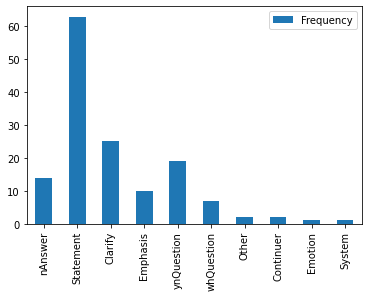

In [26]:
df.plot.bar()

In [31]:
def extract_emojis(str):
  return ''.join(c for c in str if c in emoji.UNICODE_EMOJI)

for key, val in ppl_dict.items():
    emojis = extract_emojis(str(ppl_dict[key]))
    count = Counter(emojis).most_common()[:10]

    print("{}'s emojis:\n {} \n".format(key, emojis))
    print("Most common: {}\n\n".format(count))




Person 1's emojis:
 😦🙌😭💀💀🙈🤦♀🥳🥳🥳 

Most common: [('🥳', 3), ('💀', 2), ('😦', 1), ('🙌', 1), ('😭', 1), ('🙈', 1), ('🤦', 1), ('♀', 1)]


H's emojis:
 😁😔 

Most common: [('😁', 1), ('😔', 1)]


Person ‪1‬'s emojis:
  

Most common: []




In [ ]:
df_H = 

df_1

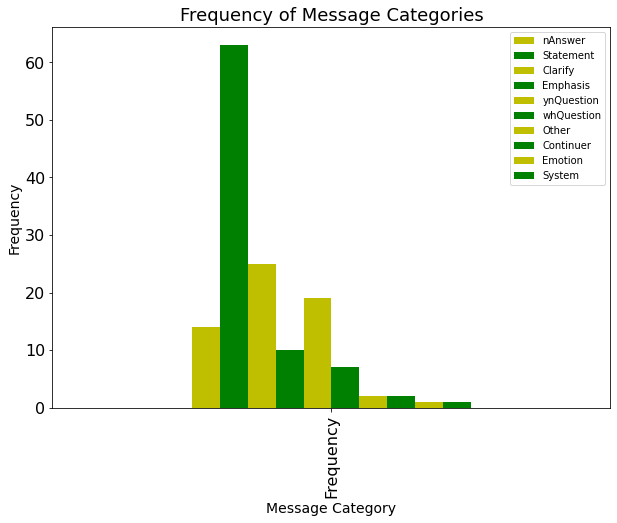

In [32]:
ax = df.T.plot(kind='bar', figsize=(10, 7), legend=True,
               fontsize=16, color=['y','g'])

ax.set_title("Frequency of Message Categories", fontsize= 18)
ax.set_xlabel("Message Category", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)

plt.show()